![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
36114,id_5300,Rome,NaN,5302.0,NaN,16.0,[['Raccomandato - Enjoy the real roman street....,/Restaurant_Review-g187791-d5815728-Reviews-Il...,d5815728,1,4.5
43205,id_12349,Paris,"['Japanese', 'Sushi']",12351.0,$,10.0,"[['Awful restaurant for foreigner customer'], ...",/Restaurant_Review-g187147-d5249985-Reviews-Os...,d5249985,1,3.5
31471,id_934,London,"['Mediterranean', 'Spanish', 'European', 'Vege...",936.0,$$ - $$$,206.0,"[['What a great find', 'Another great place in...",/Restaurant_Review-g186338-d8320074-Reviews-Th...,d8320074,1,4.5
8062,id_8062,London,"['International', 'European']",7269.0,$$ - $$$,54.0,"[['Can do better....needs to!', 'Light Christm...",/Restaurant_Review-g186338-d6378870-Reviews-Po...,d6378870,0,0.0
40612,id_1976,Warsaw,['Italian'],1978.0,NaN,8.0,"[['Pasta Experience', 'Changes'], ['11/21/2012...",/Restaurant_Review-g274856-d1947227-Reviews-Ru...,d1947227,1,3.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
#Посмотрим количество пропусков в колонках.
data.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

1.1 Number of Reviews

In [16]:
def fill_number_of_reviews(data):
    data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
    #Заменяем пропуски в Number of Reviews на среднее.
    data['Number of Reviews'] = data['Number of Reviews'].fillna(round(data.groupby('City')['Number of Reviews'].transform('mean')))
    

1.2 Price Range

In [17]:
def fill_price_range(data):
    # Сохраняем информацию о пропусках
    data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
    # Заменяем пропуски в колонке Price Range на моду:
    mode = data['Price Range'].value_counts().index[0]
    data['Price Range'] = data['Price Range'].fillna(mode)

1.3 Cuisine Style

In [18]:
def fill_cuisine_style(data):
    data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
    #Заполняем пропуски значением Else
    data['Cuisine Style'] = data['Cuisine Style'].fillna("['Else']")

1.4 Reviews

In [19]:
def fill_reviews(data):
    data['Reviews'] = data['Reviews'].fillna('[[], []]')
    data['Reviews_isNaN'] = data['Reviews'].apply(lambda x: 1 if x == '[[], []]' else 0)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

* 2.1 Price Range

In [22]:
def en_price_range(data):
    le = LabelEncoder()
    le.fit(data['Price Range'])
    data['Price Range LE'] = le.transform(data['Price Range'])

* 2.2 City

In [23]:
def en_city(data):
    # применяем One-Hot Encoding
    data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

* 2.3 Cuisine Style

In [24]:
def en_cuisine_style(data): 
    # Приведём значения к корректному списку
    data['Cuisine Style'] = data['Cuisine Style'].str.replace('[', '')
    data['Cuisine Style'] = data['Cuisine Style'].str.replace(']', '')
    data['Cuisine Style'] = data['Cuisine Style'].str.replace(' ', '')
    data['Cuisine Style'] = data['Cuisine Style'].str.split(',')
    
    # Формируем список, значение Else исключаем
    cuisines = list(data[data['Cuisine_Style_isNAN'] == 0].explode('Cuisine Style')['Cuisine Style'].value_counts()[0:10].index[0:10])
    
    # Добавляем dummy-переменные для ресторанов из топ-10
    for cuisine in cuisines:
        data[cuisine] = data['Cuisine Style'].apply(lambda x: 1 if cuisine in x else 0)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# 3. EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

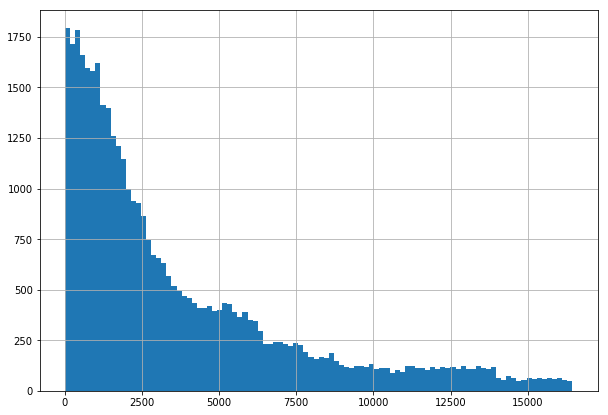

In [25]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

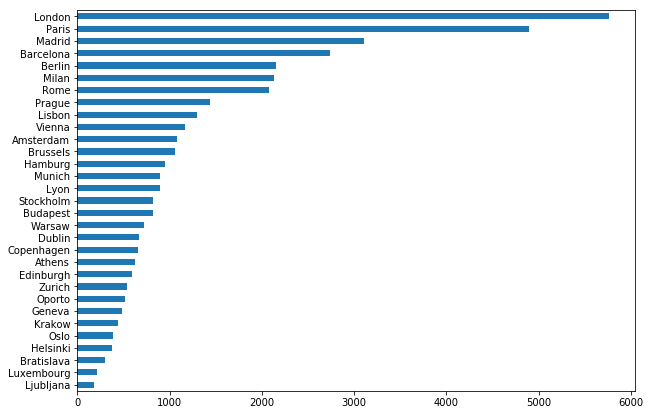

In [26]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

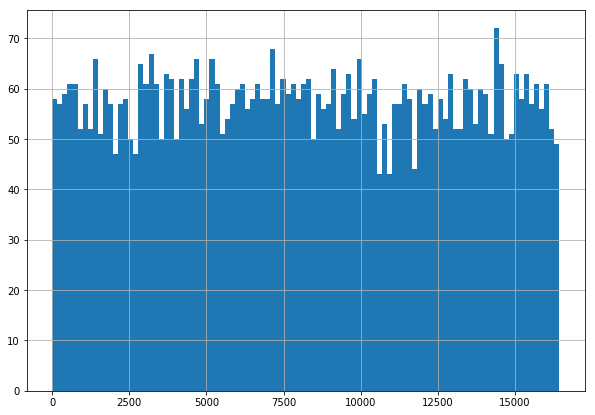

In [27]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

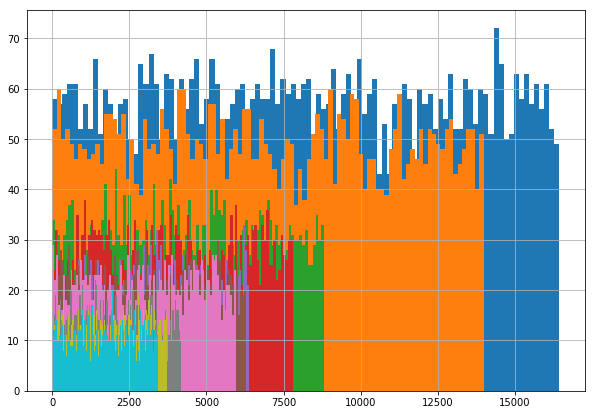

In [28]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

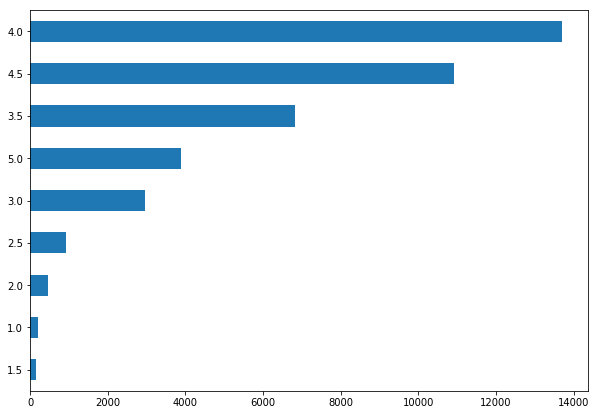

In [29]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

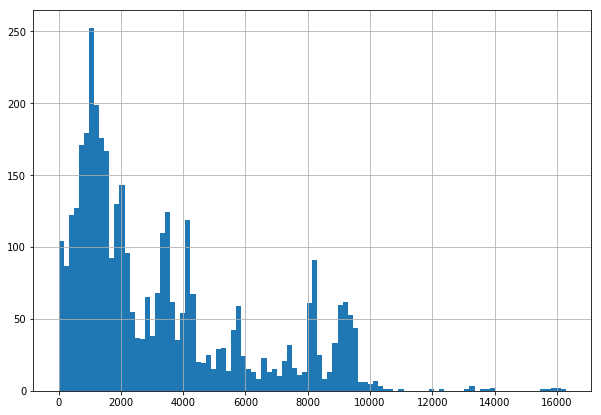

In [30]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

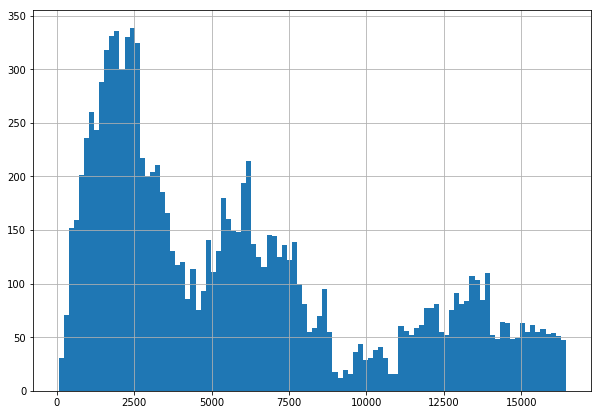

In [31]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - корреляция признаков

На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

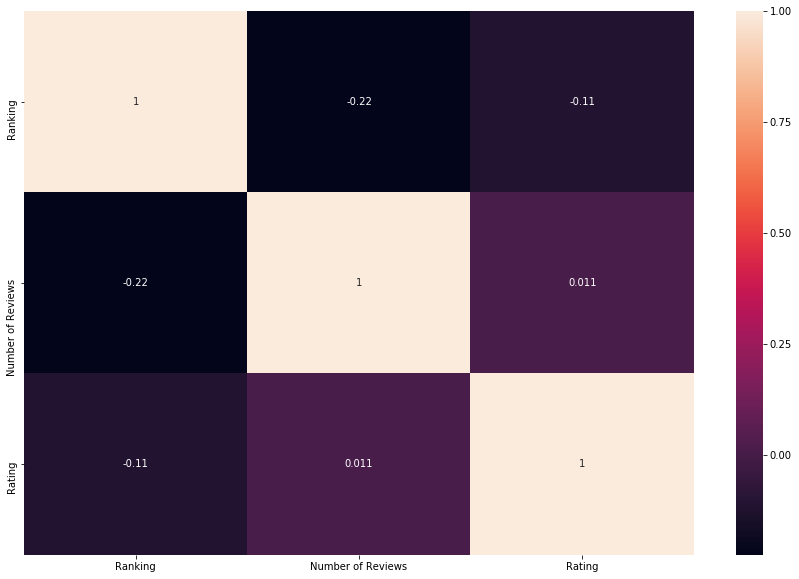

In [32]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),annot=True)

Видим, что имеющиеся на текущий момент признаки слабо скоррелированны, за исключением Cuisine_Stile_isNaN и Price_Range_isNaN. Можем сделать вывод, что у ресторанов, у которых не указана кухня, часто не указан и ценовой сегмент. На основе матрицы корреляции принимаю решение оставить все признаки.

# 4. Создание новых признаков

* 4.1 Численность населения города

In [33]:
def city_population(data):
    # Словарь с численностью населения городов
    city_population_dict = {'Paris': 2161028, 'Stockholm': 975551, 'London': 8982256, 'Berlin': 3645123, 'Munich': 1472105, 'Oporto': 214349,
       'Milan': 1352260, 'Bratislava': 424428, 'Vienna': 1897491, 'Rome': 2873494, 'Barcelona': 1622762, 'Madrid': 3223334,
       'Dublin': 544107, 'Brussels': 174383, 'Zurich': 402762, 'Warsaw': 1764615, 'Budapest': 1756243, 'Copenhagen': 602481,
       'Amsterdam': 821752, 'Lyon': 513275, 'Hamburg': 1841179, 'Lisbon': 504718, 'Prague': 1309032, 'Oslo': 634293,
       'Helsinki': 631695, 'Edinburgh': 482005, 'Geneva': 198979, 'Ljubljana': 279631, 'Athens': 664046,
       'Luxembourg': 613894, 'Krakow': 766683}
    # Добавляем колонку с численностью населения в датафрейм
    data['Population'] = data.City.map(city_population_dict)

* 4.2 Признак "Столица"

In [34]:
def capital(data):
    # Словарь со справочником столиц
    city_capital_dict = {'Paris': 1, 'Stockholm': 1, 'London': 1, 'Berlin': 1, 'Munich': 0, 'Oporto': 0,
       'Milan': 0, 'Bratislava': 1, 'Vienna': 1, 'Rome': 1, 'Barcelona': 0, 'Madrid': 1,
       'Dublin': 1, 'Brussels': 1, 'Zurich': 0, 'Warsaw': 1, 'Budapest': 1, 'Copenhagen': 1,
       'Amsterdam': 1, 'Lyon': 0, 'Hamburg': 0, 'Lisbon': 1, 'Prague': 1, 'Oslo': 1,
       'Helsinki': 1, 'Edinburgh': 1, 'Geneva': 0, 'Ljubljana': 1, 'Athens': 1,
       'Luxembourg': 1, 'Krakow': 0}
    # Добавляем колонку с признаком "Столица"
    data['Capital'] = data.City.map(city_capital_dict)

* 4.3 Положительные отзывы

In [35]:
good_words = ['good', 'nice', 'kind', 'beautiful', 'excellent', 'delicious', 'friendly',
        'open', 'amazing', 'tasty', 'fantastic', 'perfect', 'lovely',
        'super', 'awesome', 'wonderful', 'clean', 'pretty', 'interesting',
        'yummy', 'best', 'favourite', 'careful', 'useful', 'brilliant',
        'comfortable']

data['words'] = data.Reviews.str.findall(r"(\w+)")
def good_reviews(review):
    i = 0
    for x in review:
        for j in good_words:
            if j == x.lower():
                i += 1
    return i
data['reviews'] = data.words.dropna().apply(good_reviews)
data.reviews.fillna(0, inplace=True)

# Data Preprocessing

Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [36]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [37]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски
    fill_number_of_reviews(df_output) # количество отзывов
    fill_price_range(df_output) # ценовая категория
    fill_cuisine_style(df_output) # тип кухни    
    fill_reviews(df_output) # отзывы
    
    # ################### 3. Encoding ############################################################## 
    en_price_range(df_output) # ценовая категория
    en_city(df_output) # город
    en_cuisine_style(df_output) # тип кухни (берём только топ-10)
    
    
    # ################### 4. Feature Engineering ####################################################
    city_population(df_output) # численноссть населения города
    capital(df_output) # признак "Столица"
    good_reviews(df_output) #Положительные отзывы
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП).

> Запускаем и проверяем что получилось

In [38]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Reviews_isNaN,Price Range LE,'VegetarianFriendly',...,'Mediterranean','Italian','VeganOptions','GlutenFreeOptions','Bar','French','Asian','Pizza',Population,Capital
46248,2292.0,7.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,174383,1
7209,220.0,313.0,0,0.0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1352260,0
2986,3644.0,4.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1622762,0
5475,2457.0,59.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,2161028,1
29385,2723.0,78.0,1,2.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1472105,0
699,1013.0,23.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,821752,1
35664,5863.0,2.0,1,4.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,3223334,1
12238,151.0,418.0,1,4.5,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,2161028,1
8370,1066.0,4.0,0,0.0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,198979,0
32712,921.0,48.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,513275,0


In [39]:
df_preproc

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Reviews_isNaN,Price Range LE,'VegetarianFriendly',...,'Mediterranean','Italian','VeganOptions','GlutenFreeOptions','Bar','French','Asian','Pizza',Population,Capital
0,12963.0,4.0,0,0.0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,2161028,1
1,106.0,97.0,0,0.0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,631695,1
2,810.0,28.0,0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,482005,1
3,1669.0,202.0,0,0.0,0,0,0,0,2,1,...,1,1,0,1,0,0,0,0,8982256,1
4,37.0,162.0,0,0.0,0,0,0,0,2,1,...,1,1,0,1,0,0,0,0,424428,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,500.0,79.0,1,4.5,0,0,0,0,1,1,...,0,1,1,1,0,0,0,0,1352260,0
49996,6341.0,542.0,1,3.5,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,2161028,1
49997,1652.0,4.0,1,4.5,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,975551,1
49998,641.0,70.0,1,4.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1764615,1


In [40]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

> Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.

In [41]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [42]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 20), (40000, 20), (40000, 19), (32000, 19), (8000, 19))

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 42823 to 47682
Data columns (total 19 columns):
Ranking                    8000 non-null float64
Number of Reviews          8000 non-null float64
Number_of_Reviews_isNAN    8000 non-null uint8
Price_Range_isNAN          8000 non-null uint8
Cuisine_Style_isNAN        8000 non-null uint8
Reviews_isNaN              8000 non-null int64
Price Range LE             8000 non-null int64
'VegetarianFriendly'       8000 non-null int64
'European'                 8000 non-null int64
'Mediterranean'            8000 non-null int64
'Italian'                  8000 non-null int64
'VeganOptions'             8000 non-null int64
'GlutenFreeOptions'        8000 non-null int64
'Bar'                      8000 non-null int64
'French'                   8000 non-null int64
'Asian'                    8000 non-null int64
'Pizza'                    8000 non-null int64
Population                 8000 non-null int64
Capital                    8000 non-nu

# Model

Сам ML

In [44]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [45]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [46]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
y_pred = np.round(y_pred * 2) / 2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [47]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.18175


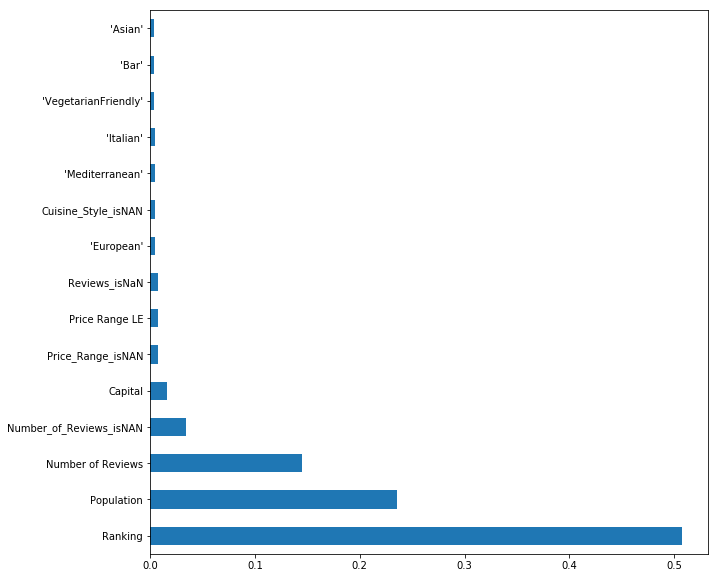

In [48]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

Если все устраевает - готовим Submission на кагл

In [49]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Reviews_isNaN,Price Range LE,'VegetarianFriendly','European','Mediterranean','Italian','VeganOptions','GlutenFreeOptions','Bar','French','Asian','Pizza',Population,Capital
2026,98.0,637.0,0.0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,821752,1
2027,7403.0,20.0,0.0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1622762,0
9459,403.0,48.0,0.0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,975551,1
2954,15164.0,6.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8982256,1
2139,656.0,19.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,214349,0
2613,335.0,311.0,0.0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,544107,1
398,140.0,533.0,0.0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,504718,1
3987,1965.0,21.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1472105,0
6393,4800.0,115.0,0.0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,8982256,1
2343,1261.0,46.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,821752,1


In [50]:
test_data = test_data.drop(['Rating'], axis=1)

In [51]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [52]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
for i in range(predict_submission.size):
        predict_submission[i]=np.round(predict_submission[i] * 2) / 2

In [54]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [55]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [56]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.0
8,id_8,4.0
9,id_9,5.0


# What's next?
Или что делать, чтоб улучшить результат:

* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!